In [3]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import requests
import os
import numpy as np

pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows', 200)

## Load Statistics

In [4]:
standings_df = pd.read_csv('data/outputs/standings.csv')
standings_df.head()

position  playedGames form  won  draw  lost  points  goalsFor   
0         1           29  NaN   24     2     3      74        66  \
1         2           28  NaN   16     7     5      55        44   
2         3           29  NaN   15     7     7      52        48   
3         4           29  NaN   16     3    10      51        48   
4         5           28  NaN   15     5     8      50        38   

   goalsAgainst  goalDifference team_short_name  team_group competition  
0            21              45          Napoli           0     Serie A  
1            19              25           Lazio           0     Serie A  
2            36              12           Milan           0     Serie A  
3            33              15           Inter           0     Serie A  
4            26              12            Roma           0     Serie A

In [5]:
matches_df = pd.read_csv('data/outputs/matches.csv')
matches_df.head()

main_team opponent_team  goal_fatti  no_goal   goal  tot_goals   
0       Milan       Udinese           4    False   True          6  \
1   Sampdoria      Atalanta           0     True  False          2   
2       Lecce         Inter           1    False   True          3   
3       Monza        Torino           1    False   True          3   
4  Fiorentina     Cremonese           3    False   True          5   

   goal_subiti away_home result  team_has_scored  ...  form won  draw lost   
0            2      home    Win             True  ...   NaN   9    11    8  \
1            2      home   Loss            False  ...   NaN  14     6    8   
2            2      home   Loss             True  ...   NaN  16     3   10   
3            2      home   Loss             True  ...   NaN  10     8   10   
4            2      home    Win             True  ...   NaN   1    10   17   

   points  goalsFor goalsAgainst  goalDifference  team_short_name  team_group  
0      38        37           34               3          Udinese           1  
1      48        47           32              15         Atalanta           0  
2      51        48           33              15            Inter           0  
3      38        30           34              -4           Torino           1  
4      13        23           52             -29        Cremonese           2  

[5 rows x 26 columns]

In [6]:
win_draw_loss = pd.read_csv('data/outputs/win_draw_loss.csv')
win_draw_loss.head()

main_team team_group     competition  n_matches   avg_win  avg_draw   
0   Almeria          0         La Liga         10  0.100000  0.100000  \
1   Almeria          1         La Liga         11  0.454545  0.090909   
2   Almeria          2         La Liga          6  0.166667  0.666667   
3   Almeria        all         La Liga         27  0.259259  0.222222   
4   Arsenal          0  Premier League          9  0.666667  0.111111   

   avg_loss  win_streak_weighted  draw_streak_weighted  loss_streak_weighted   
0  0.800000                 24.0                  17.0                 104.0  \
1  0.454545                 47.0                  28.0                  81.0   
2  0.166667                 19.0                  62.0                   4.0   
3  0.518519                 90.0                 107.0                 189.0   
4  0.222222                 97.0                  19.0                  18.0   

   tot_giornata  win_streak_weighted_ratio  draw_streak_weighted_ratio   
0         145.0                   0.165517                    0.117241  \
1         156.0                   0.301282                    0.179487   
2          85.0                   0.223529                    0.729412   
3         386.0                   0.233161                    0.277202   
4         134.0                   0.723881                    0.141791   

   loss_streak_weighted_ratio  
0                    0.717241  
1                    0.519231  
2                    0.047059  
3                    0.489637  
4                    0.134328

In [7]:
win_draw_loss_away_home = pd.read_csv('data/outputs/win_draw_loss_away_home.csv')
win_draw_loss_away_home.head()

main_team team_group competition away_home  n_matches   avg_win  avg_draw   
0   Almeria          0     La Liga      away          4  0.000000  0.000000  \
1   Almeria          0     La Liga      home          6  0.166667  0.166667   
2   Almeria          1     La Liga      away          5  0.000000  0.200000   
3   Almeria          1     La Liga      home          6  0.833333  0.000000   
4   Almeria          2     La Liga      away          4  0.000000  0.750000   

   avg_loss  win_streak_weighted  draw_streak_weighted  loss_streak_weighted   
0  1.000000                  0.0                   0.0                  40.0  \
1  0.666667                 24.0                  17.0                  64.0   
2  0.800000                  0.0                  28.0                  76.0   
3  0.166667                 47.0                   0.0                   5.0   
4  0.250000                  0.0                  35.0                   4.0   

   tot_giornata  win_streak_weighted_ratio  draw_streak_weighted_ratio   
0          40.0                   0.000000                    0.000000  \
1         105.0                   0.228571                    0.161905   
2         104.0                   0.000000                    0.269231   
3          52.0                   0.903846                    0.000000   
4          39.0                   0.000000                    0.897436   

   loss_streak_weighted_ratio  
0                    1.000000  
1                    0.609524  
2                    0.730769  
3                    0.096154  
4                    0.102564

In [8]:
scored_conceded_goal_group = pd.read_csv('data/outputs/team_scored_conceded_goal_group.csv')
scored_conceded_goal_group.head()

main_team team_group     competition  n_matches  team_has_scored   
0   Almeria          0         La Liga         10                6  \
1   Almeria          1         La Liga         11                8   
2   Almeria          2         La Liga          6                5   
3   Almeria        all         La Liga         27               19   
4   Arsenal          0  Premier League          9                8   

   team_has_conceded_goal  team_has_scored_streak_weighted   
0                       9                             84.0  \
1                      10                            124.0   
2                       6                             81.0   
3                      25                            289.0   
4                       7                            115.0   

   team_has_conceded_goal_streak_weighted  tot_giornata   
0                                   121.0         145.0  \
1                                   142.0         156.0   
2                                    85.0          85.0   
3                                   348.0         386.0   
4                                    95.0         134.0   

   team_has_scored_streak_weighted_ratio   
0                               0.579310  \
1                               0.794872   
2                               0.952941   
3                               0.748705   
4                               0.858209   

   team_has_conceded_goal_streak_weighted_ratio  team_has_conceded_goal_ratio   
0                                      0.834483                      0.900000  \
1                                      0.910256                      0.909091   
2                                      1.000000                      1.000000   
3                                      0.901554                      0.925926   
4                                      0.708955                      0.777778   

   team_has_scored_ratio  
0               0.600000  
1               0.727273  
2               0.833333  
3               0.703704  
4               0.888889

In [9]:
no_goal_group = pd.read_csv('data/outputs/no_goal_group.csv')
no_goal_group.head()

main_team team_group     competition  n_matches  no_goal   
0   Almeria          0         La Liga         10        5  \
1   Almeria          1         La Liga         11        4   
2   Almeria          2         La Liga          6        1   
3   Almeria        all         La Liga         27       10   
4   Arsenal          0  Premier League          9        2   

   no_goal_streak_weighted  tot_giornata  no_goal_streak_weighted_ratio   
0                     85.0         145.0                       0.586207  \
1                     46.0         156.0                       0.294872   
2                      4.0          85.0                       0.047059   
3                    135.0         386.0                       0.349741   
4                     39.0         134.0                       0.291045   

   no_goal_ratio  goal_ratio  
0       0.500000    0.500000  
1       0.363636    0.636364  
2       0.166667    0.833333  
3       0.370370    0.629630  
4       0.222222    0.777778

In [10]:
no_goal_group_away_home = pd.read_csv('data/outputs/no_goal_group_away_home.csv')
no_goal_group_away_home.head()

main_team team_group away_home competition  n_matches  no_goal   
0   Almeria          0      away     La Liga          4        2  \
1   Almeria          0      home     La Liga          6        3   
2   Almeria          1      away     La Liga          5        2   
3   Almeria          1      home     La Liga          6        2   
4   Almeria          2      away     La Liga          4        1   

   no_goal_streak_weighted  tot_giornata  no_goal_streak_weighted_ratio   
0                     20.0          40.0                       0.500000  \
1                     65.0         105.0                       0.619048   
2                     27.0         104.0                       0.259615   
3                     19.0          52.0                       0.365385   
4                      4.0          39.0                       0.102564   

   no_goal_ratio  goal_ratio  
0       0.500000    0.500000  
1       0.500000    0.500000  
2       0.400000    0.600000  
3       0.333333    0.666667  
4       0.250000    0.750000

In [11]:
n_goal_group = pd.read_csv('data/outputs/num_goals_group.csv')
n_goal_group.head()

main_team team_group     competition  n_matches  avg_goal_fatti   
0   Almeria          0         La Liga         10        0.700000  \
1   Almeria          1         La Liga         11        1.545455   
2   Almeria          2         La Liga          6        1.333333   
3   Almeria        all         La Liga         27        1.185185   
4   Arsenal          0  Premier League          9        2.222222   

   avg_goal_subiti  
0         2.100000  
1         1.727273  
2         1.166667  
3         1.740741  
4         1.555556

## Exploration

#### Teams with highest delta average goals for-against

In [12]:
dd = n_goal_group[no_goal_group.team_group=='all']
dd['delta_goal'] = dd['avg_goal_fatti'] - dd['avg_goal_subiti']
dd.sort_values('delta_goal', ascending=False)\
    [['main_team','competition','n_matches','avg_goal_fatti','avg_goal_subiti','delta_goal']].head(10)

main_team     competition  n_matches  avg_goal_fatti   
35   Bayern Munich      Bundesliga         26        2.923077  \
31       Barcelona         La Liga         27        1.962963   
183       Man City  Premier League         28        2.535714   
199         Napoli         Serie A         28        2.285714   
7          Arsenal  Premier League         29        2.413793   
219    Real Madrid         La Liga         27        2.111111   
203      Newcastle  Premier League         28        1.642857   
147          Lazio         Serie A         28        1.571429   
23      Ath Madrid         La Liga         27        1.592593   
143       Juventus         Serie A         28        1.642857   

     avg_goal_subiti  delta_goal  
35          1.115385    1.807692  
31          0.333333    1.629630  
183         0.928571    1.607143  
199         0.714286    1.571429  
7           0.931034    1.482759  
219         0.777778    1.333333  
203         0.714286    0.928571  
147         0.678571    0.892857  
23          0.703704    0.888889  
143         0.785714    0.857143

#### Teams with highest delta average goals for-against, with top tier teams in their championship

In [13]:
dd = n_goal_group[no_goal_group.team_group=='0']
dd['delta_goal'] = dd['avg_goal_fatti'] - dd['avg_goal_subiti']
dd.sort_values('delta_goal', ascending=False)\
    [['main_team','competition','n_matches','avg_goal_fatti','avg_goal_subiti','delta_goal']].head(10)

main_team     competition  n_matches  avg_goal_fatti   
32   Bayern Munich      Bundesliga         10        2.800000  \
28       Barcelona         La Liga          9        2.111111   
180       Man City  Premier League         10        2.600000   
4          Arsenal  Premier League          9        2.222222   
200      Newcastle  Premier League          8        1.375000   
144          Lazio         Serie A          9        1.444444   
164      Liverpool  Premier League         11        2.181818   
196         Napoli         Serie A         10        1.600000   
216    Real Madrid         La Liga          9        1.333333   
80        Dortmund      Bundesliga         10        1.900000   

     avg_goal_subiti  delta_goal  
32          1.000000    1.800000  
28          0.666667    1.444444  
180         1.500000    1.100000  
4           1.555556    0.666667  
200         0.750000    0.625000  
144         0.888889    0.555556  
164         1.636364    0.545455  
196         1.100000    0.500000  
216         0.888889    0.444444  
80          1.500000    0.400000

#### Teams with highest NO GOAL percentage of matches

In [14]:
no_goal_group[no_goal_group.team_group=='all'].sort_values('no_goal_ratio', ascending=False)\
    [['main_team','competition','n_matches','no_goal','no_goal_ratio']].head(10)

main_team competition  n_matches  no_goal  no_goal_ratio
31    Barcelona     La Liga         27       21       0.777778
143    Juventus     Serie A         28       21       0.750000
147       Lazio     Serie A         28       19       0.678571
179    Mallorca     La Liga         27       18       0.666667
295  Villarreal     La Liga         27       18       0.666667
283  Valladolid     La Liga         27       18       0.666667
231   Sampdoria     Serie A         28       18       0.642857
63        Cadiz     La Liga         27       17       0.629630
19   Ath Bilbao     La Liga         27       17       0.629630
211     Osasuna     La Liga         27       17       0.629630

#### Teams with highest percentage of GOAL matches

In [15]:
no_goal_group[no_goal_group.team_group=='all'].sort_values('goal_ratio', ascending=False)\
    [['main_team','competition','n_matches','no_goal','goal_ratio']].head(10)

main_team competition  n_matches  no_goal  goal_ratio
127         Girona     La Liga         27        7    0.740741
99         Espanol     La Liga         27        7    0.740741
35   Bayern Munich  Bundesliga         26        9    0.653846
259      Stuttgart  Bundesliga         26        9    0.653846
87   Ein Frankfurt  Bundesliga         26        9    0.653846
131         Hertha  Bundesliga         26        9    0.653846
135     Hoffenheim  Bundesliga         26        9    0.653846
299  Werder Bremen  Bundesliga         26        9    0.653846
191          Milan     Serie A         28       10    0.642857
243        Sevilla     La Liga         27       10    0.629630

#### Teams with imporvements in NO GOAL looking at recent trends

In [16]:
dd = no_goal_group[no_goal_group.team_group=='all']
dd['no_goal_streak_delta'] = (dd['no_goal_streak_weighted_ratio'] - dd['no_goal_ratio'])* 100 / dd['no_goal_ratio']
dd.sort_values('no_goal_streak_delta', ascending=False)\
    [['main_team','competition','n_matches',\
      'no_goal_streak_weighted_ratio','no_goal_streak_delta','no_goal_ratio']].head(10)

main_team     competition  n_matches  no_goal_streak_weighted_ratio   
219  Real Madrid         La Liga         27                       0.533679  \
107      FC Koln      Bundesliga         26                       0.632479   
119       Fulham  Premier League         28                       0.493857   
151        Lecce         Serie A         28                       0.571429   
199       Napoli         Serie A         28                       0.729064   
139        Inter         Serie A         28                       0.598522   
167    Liverpool  Premier League         28                       0.632558   
47       Bologna         Serie A         28                       0.504926   
187   Man United  Premier League         28                       0.628993   
243      Sevilla         La Liga         27                       0.432642   

     no_goal_streak_delta  no_goal_ratio  
219             30.993877       0.407407  
107             26.495726       0.500000  
119             25.709180       0.392857  
151             23.076923       0.464286  
199             20.081136       0.607143  
139             19.704433       0.500000  
167             18.077519       0.535714  
47              17.816092       0.428571  
187             17.411957       0.535714  
243             16.813472       0.370370

#### Teams with imporvements in WINS looking at recent trends

In [27]:
dd = win_draw_loss[win_draw_loss.team_group=='all']
dd = dd[dd.avg_win > 0.2]
dd['win_streak_weighted_delta'] = (dd['win_streak_weighted_ratio'] - dd['avg_win'])* 100 / dd['avg_win']
dd.sort_values('win_streak_weighted_delta', ascending=False)\
    [['main_team','competition','n_matches',\
      'win_streak_weighted_ratio','win_streak_weighted_delta','avg_win']].head(10)

main_team     competition  n_matches  win_streak_weighted_ratio   
163   Leverkusen      Bundesliga         26                   0.586895  \
243      Sevilla         La Liga         27                   0.370466   
43        Bochum      Bundesliga         26                   0.378917   
111   Fiorentina         Serie A         28                   0.477833   
47       Bologna         Serie A         28                   0.470443   
311       Wolves  Premier League         29                   0.287356   
235     Sassuolo         Serie A         28                   0.421182   
11   Aston Villa  Premier League         29                   0.524138   
63         Cadiz         La Liga         27                   0.256477   
103      Everton  Premier League         29                   0.236782   

     win_streak_weighted_delta   avg_win  
163                  27.160494  0.461538  
243                  25.032383  0.296296  
43                   23.148148  0.307692  
111                  21.630094  0.392857  
47                   19.749216  0.392857  
311                  19.047619  0.241379  
235                  17.931034  0.357143  
11                   16.923077  0.448276  
63                   15.414508  0.222222  
103                  14.444444  0.206897

#### Best Improving Defenses

In [80]:
dd = matches_df[['main_team','goal_subiti','giornata','competition']]
dd1 = dd.groupby(['main_team','competition'])\
    .mean().reset_index()\
    .rename(columns={"goal_subiti":"avg_goal_subiti"})
dd['goal_subiti_weighted'] = dd['goal_subiti']*dd['giornata']
dd2 = dd.groupby(['main_team','competition'])\
    .sum().reset_index()\
    .rename(columns={"giornata":"tot_giornata"})
dd3 = dd1.merge(dd2, on=['main_team','competition'])
dd3['goal_subiti_weighted_ratio'] = dd3['goal_subiti_weighted']/dd3['tot_giornata']
dd3['goal_subiti_weighted_ratio_delta'] = dd3['avg_goal_subiti'] - dd3['goal_subiti_weighted_ratio']
dd3.sort_values('goal_subiti_weighted_ratio_delta', ascending=False).head()

main_team competition  avg_goal_subiti   giornata  goal_subiti   
10      Bochum  Bundesliga         2.192308  13.500000           57  \
16       Celta     La Liga         1.370370  14.296296           37   
59  Schalke 04  Bundesliga         1.846154  13.500000           48   
30      Getafe     La Liga         1.259259  14.296296           34   
11     Bologna     Serie A         1.285714  14.500000           36   

    tot_giornata  goal_subiti_weighted  goal_subiti_weighted_ratio   
10         351.0                 670.0                    1.908832  \
16         386.0                 428.0                    1.108808   
59         351.0                 564.0                    1.606838   
30         386.0                 404.0                    1.046632   
11         406.0                 441.0                    1.086207   

    goal_subiti_weighted_ratio_delta  
10                          0.283476  
16                          0.261562  
59                          0.239316  
30                          0.212627  
11                          0.199507

##### Focus on teams with less than 1 goals conceded on average

In [101]:
dd3 = dd3[dd3.goal_subiti_weighted_ratio < 1]
dd3.sort_values('goal_subiti_weighted_ratio_delta', ascending=False).head()

main_team     competition  avg_goal_subiti   giornata  goal_subiti   
5    Ath Madrid         La Liga         0.703704  14.296296           19  \
61     Sociedad         La Liga         0.962963  14.296296           26   
45     Man City  Premier League         0.928571  14.535714           26   
54  Real Madrid         La Liga         0.777778  14.296296           21   
36        Lazio         Serie A         0.678571  14.500000           19   

    tot_giornata  goal_subiti_weighted  goal_subiti_weighted_ratio   
5          386.0                 220.0                    0.569948  \
61         386.0                 331.0                    0.857513   
45         407.0                 345.0                    0.847666   
54         386.0                 270.0                    0.699482   
36         406.0                 250.0                    0.615764   

    goal_subiti_weighted_ratio_delta  
5                           0.133756  
61                          0.105450  
45                          0.080906  
54                          0.078296  
36                          0.062808

<Axes: title={'center': 'Average Goal Subiti Overtime - Ath Madrid'}>

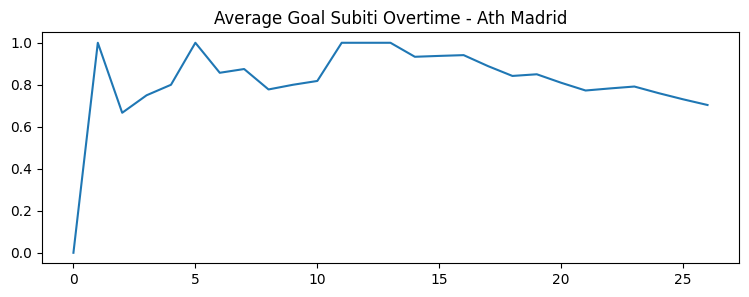

In [102]:
team = 'Ath Madrid'
matches_df[(matches_df.main_team==f"{team}")]\
        .sort_values('giornata')\
        .goal_subiti.expanding()\
        .mean().reset_index()\
        .goal_subiti.plot(kind='line', title=f"Average Goal Subiti Overtime - {team}",\
                          figsize=(9,3))

#### Just checking the actual matches

In [90]:
matches_df[(matches_df.main_team=='Real Madrid')&(matches_df.away_home=='away')]\
          .sort_values('giornata')\
        [['main_team','opponent_team','away_home','no_goal',
          'goal_fatti','goal_subiti','giornata','team_group']]

main_team opponent_team away_home  no_goal  goal_fatti  goal_subiti   
1304  Real Madrid       Almeria      away    False           2            1  \
1312  Real Madrid         Celta      away    False           4            1   
1325  Real Madrid       Espanol      away    False           3            1   
1357  Real Madrid    Ath Madrid      away    False           2            1   
1372  Real Madrid        Getafe      away     True           1            0   
1394  Real Madrid         Elche      away     True           3            0   
1427  Real Madrid     Vallecano      away    False           2            3   
1444  Real Madrid    Valladolid      away     True           2            0   
1450  Real Madrid    Villarreal      away    False           1            2   
1475  Real Madrid    Ath Bilbao      away     True           2            0   
1493  Real Madrid      Mallorca      away     True           0            1   
1512  Real Madrid       Osasuna      away     True           2            0   
1536  Real Madrid         Betis      away     True           0            0   
1557  Real Madrid     Barcelona      away    False           1            2   

      giornata  team_group  
1304       1.0           2  
1312       2.0           1  
1325       3.0           2  
1357       6.0           0  
1372       8.0           1  
1394      10.0           2  
1427      13.0           1  
1444      15.0           2  
1450      16.0           0  
1475      18.0           0  
1493      21.0           1  
1512      23.0           1  
1536      25.0           0  
1557      27.0           0